In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [2]:
data = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

In [3]:
data = data.loc[data['Price']!='Not Priced']
data['Price']= data['Price'].replace('[\$,]', '', regex=True).astype(float)
data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998.0,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985.0,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860.0,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500.0,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000.0,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374.0,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998.0,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944.0,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568.0,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [4]:
state = pd.DataFrame(data['State'].value_counts())
state

,State
TX,1225
FL,888
CA,668
IL,593
NY,439
GA,392
AZ,344
VA,338
NJ,337
OH,328


<AxesSubplot:>

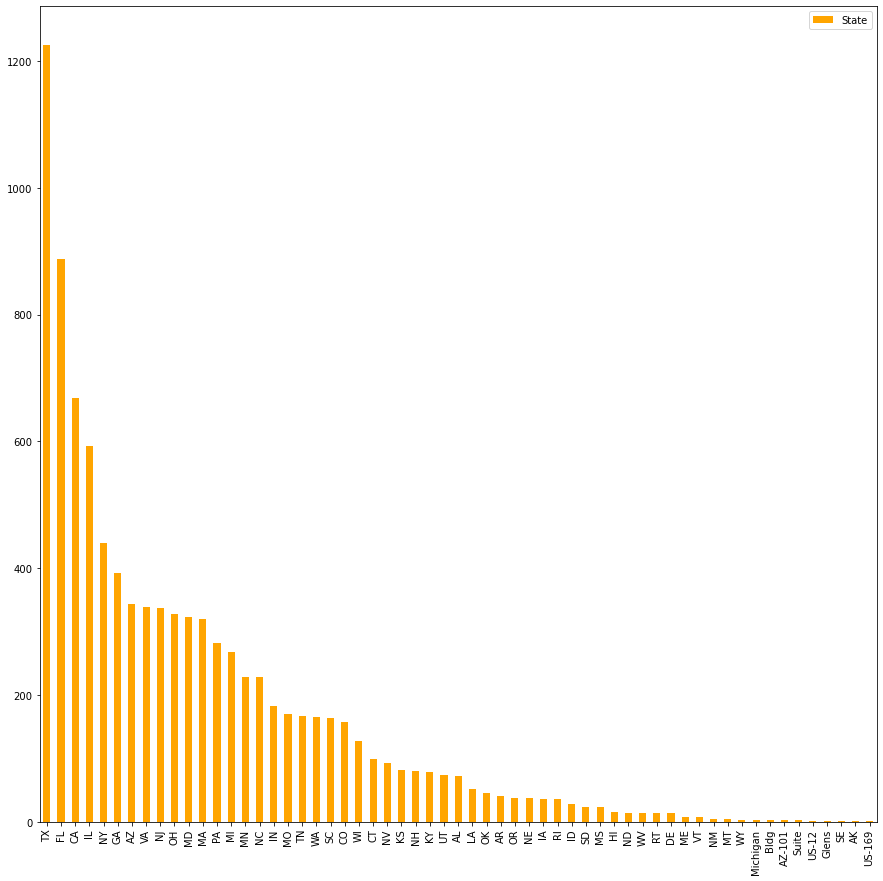

In [5]:
state.plot.bar(color = 'orange',figsize = (15,15))

In [6]:
#The top five states with the most listing: 
#Texas with 1225, Florida with 888, California with 668, Illinois with 593 and New York with 439.

In [7]:
zipcode = pd.DataFrame(data['Zipcode'].value_counts())
zipcode

,Zipcode
76051,69
75093,65
30096,63
29607,48
75034,46
...,...
14224,1
23452,1
07940,1
96021,1


In [8]:
#Zip Code 76051, 75093 and 75034 are located in the state of Texas.

In [9]:
price = data.groupby(['State', 'Price']).mean(['Price'])
price

Year  ConsumerRating  ConsumerReviews  SellerRating  \
State Price                                                            
AK    32300.0  2020.0             4.8            133.0           4.7   
AL    15388.0  2014.0             4.7             98.0           2.1   
      15900.0  2013.0             4.7            140.0           4.8   
      17995.0  2015.0             4.8            296.0           4.7   
      20894.0  2017.0             4.7             40.0           4.6   
...               ...             ...              ...           ...   
WV    57841.0  2020.0             4.8             77.0           4.4   
      59283.0  2021.0             4.6              8.0           4.9   
WY    48258.0  2021.0             4.7             58.0           3.2   
      48841.0  2021.0             4.7             58.0           3.2   
      48990.0  2020.0             4.8             77.0           4.6   

               SellerReviews  ComfortRating  InteriorDesignRating  \
State Price                                                         
AK    32300.0          915.0            4.9                   4.7   
AL    15388.0           12.0            4.7                   4.7   
      15900.0           96.0            4.7                   4.7   
      17995.0         2356.0            4.9                   4.8   
      20894.0           56.0            4.9                   4.6   
...                      ...            ...                   ...   
WV    57841.0          181.0            4.8                   4.8   
      59283.0          131.0            4.9                   4.2   
WY    48258.0           26.0            4.7                   4.7   
      48841.0           26.0            4.7                   4.7   
      48990.0          162.0            4.8                   4.8   

               PerformanceRating  ValueForMoneyRating  ExteriorStylingRating  \
State Price                                                                    
AK    32300.0                4.7                  4.6                    4.8   
AL    15388.0                4.7                  4.5                    4.8   
      15900.0                4.7                  4.7                    4.7   
      17995.0                4.8                  4.6                    4.9   
      20894.0                4.4                  4.6                    4.7   
...                          ...                  ...                    ...   
WV    57841.0                4.8                  4.5                    4.9   
      59283.0                4.8                  4.1                    4.6   
WY    48258.0                4.7                  4.5                    4.7   
      48841.0                4.7                  4.5                    4.7   
      48990.0                4.8                  4.5                    4.9   

               ReliabilityRating  MinMPG  MaxMPG   Mileage  
State Price                                                 
AK    32300.0                4.8    25.0    32.0   40202.0  
AL    15388.0                4.7    20.0    29.0   92197.0  
      15900.0                4.8    20.0    25.0  153174.0  
      17995.0                4.7    17.0    25.0  156412.0  
      20894.0                4.8    24.0    35.0   96641.0  
...                          ...     ...     ...       ...  
WV    57841.0                4.8    17.0    23.0   22155.0  
      59283.0                4.9    15.0    19.0   11586.0  
WY    48258.0                4.7    18.0    25.0   14671.0  
      48841.0                4.7    18.0    25.0   13144.0  
      48990.0                4.8    17.0    23.0   19839.0  

[7763 rows x 14 columns]

In [10]:
price.head(10)

Year  ConsumerRating  ConsumerReviews  SellerRating  \
State Price                                                            
AK    32300.0  2020.0             4.8            133.0           4.7   
AL    15388.0  2014.0             4.7             98.0           2.1   
      15900.0  2013.0             4.7            140.0           4.8   
      17995.0  2015.0             4.8            296.0           4.7   
      20894.0  2017.0             4.7             40.0           4.6   
      23277.0  2016.0             4.6            114.0           2.6   
      24277.0  2020.0             4.8            133.0           2.6   
      24497.0  2018.0             4.8            770.0           3.3   
      24729.0  2021.0             4.8             59.0           5.0   
      25599.0  2021.0             4.8             46.0           5.0   

               SellerReviews  ComfortRating  InteriorDesignRating  \
State Price                                                         
AK    32300.0          915.0            4.9                   4.7   
AL    15388.0           12.0            4.7                   4.7   
      15900.0           96.0            4.7                   4.7   
      17995.0         2356.0            4.9                   4.8   
      20894.0           56.0            4.9                   4.6   
      23277.0           19.0            4.7                   4.5   
      24277.0           19.0            4.9                   4.7   
      24497.0           19.0            4.8                   4.7   
      24729.0            4.0            4.9                   4.8   
      25599.0            4.0            4.8                   4.8   

               PerformanceRating  ValueForMoneyRating  ExteriorStylingRating  \
State Price                                                                    
AK    32300.0                4.7                  4.6                    4.8   
AL    15388.0                4.7                  4.5                    4.8   
      15900.0                4.7                  4.7                    4.7   
      17995.0                4.8                  4.6                    4.9   
      20894.0                4.4                  4.6                    4.7   
      23277.0                4.5                  4.5                    4.5   
      24277.0                4.7                  4.6                    4.8   
      24497.0                4.8                  4.7                    4.8   
      24729.0                4.8                  4.6                    4.8   
      25599.0                4.7                  4.8                    4.9   

               ReliabilityRating  MinMPG  MaxMPG   Mileage  
State Price                                                 
AK    32300.0                4.8    25.0    32.0   40202.0  
AL    15388.0                4.7    20.0    29.0   92197.0  
      15900.0                4.8    20.0    25.0  153174.0  
      17995.0                4.7    17.0    25.0  156412.0  
      20894.0                4.8    24.0    35.0   96641.0  
      23277.0                4.6    19.0    27.0   96384.0  
      24277.0                4.8    25.0    32.0   66295.0  
      24497.0                4.9    23.0    30.0   48075.0  
      24729.0                4.8    23.0    30.0   33176.0  
      25599.0                4.8    28.0    38.0   10228.0

In [11]:
price.tail(10)

Year  ConsumerRating  ConsumerReviews  SellerRating  \
State Price                                                            
WV    43500.0  2016.0             4.6             91.0           4.8   
      45800.0  2021.0             4.9             91.0           4.8   
      47350.0  2021.0             4.9             37.0           4.8   
      49875.0  2019.0             4.6             70.0           4.4   
      56999.0  2019.0             4.8             40.0           4.8   
      57841.0  2020.0             4.8             77.0           4.4   
      59283.0  2021.0             4.6              8.0           4.9   
WY    48258.0  2021.0             4.7             58.0           3.2   
      48841.0  2021.0             4.7             58.0           3.2   
      48990.0  2020.0             4.8             77.0           4.6   

               SellerReviews  ComfortRating  InteriorDesignRating  \
State Price                                                         
WV    43500.0          216.0            4.7                   4.6   
      45800.0          216.0            4.9                   4.9   
      47350.0          216.0            4.9                   4.8   
      49875.0          181.0            4.7                   4.6   
      56999.0          410.0            4.8                   4.8   
      57841.0          181.0            4.8                   4.8   
      59283.0          131.0            4.9                   4.2   
WY    48258.0           26.0            4.7                   4.7   
      48841.0           26.0            4.7                   4.7   
      48990.0          162.0            4.8                   4.8   

               PerformanceRating  ValueForMoneyRating  ExteriorStylingRating  \
State Price                                                                    
WV    43500.0                4.6                  4.4                    4.7   
      45800.0                4.8                  4.8                    4.9   
      47350.0                4.8                  4.8                    4.9   
      49875.0                4.6                  4.3                    4.7   
      56999.0                4.8                  4.5                    4.8   
      57841.0                4.8                  4.5                    4.9   
      59283.0                4.8                  4.1                    4.6   
WY    48258.0                4.7                  4.5                    4.7   
      48841.0                4.7                  4.5                    4.7   
      48990.0                4.8                  4.5                    4.9   

               ReliabilityRating  MinMPG  MaxMPG  Mileage  
State Price                                                
WV    43500.0                4.7    15.0    21.0  36205.0  
      45800.0                4.8    19.0    24.0  26659.0  
      47350.0                4.9    17.0    25.0  12027.0  
      49875.0                4.7    15.0    21.0  47277.0  
      56999.0                4.7    21.0    29.0  14716.0  
      57841.0                4.8    17.0    23.0  22155.0  
      59283.0                4.9    15.0    19.0  11586.0  
WY    48258.0                4.7    18.0    25.0  14671.0  
      48841.0                4.7    18.0    25.0  13144.0  
      48990.0                4.8    17.0    23.0  19839.0

In [12]:
price.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7763 entries, ('AK', 32300.0) to ('WY', 48990.0)
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   7763 non-null   float64
 1   ConsumerRating         7763 non-null   float64
 2   ConsumerReviews        7763 non-null   float64
 3   SellerRating           7763 non-null   float64
 4   SellerReviews          7763 non-null   float64
 5   ComfortRating          7763 non-null   float64
 6   InteriorDesignRating   7763 non-null   float64
 7   PerformanceRating      7763 non-null   float64
 8   ValueForMoneyRating    7763 non-null   float64
 9   ExteriorStylingRating  7763 non-null   float64
 10  ReliabilityRating      7763 non-null   float64
 11  MinMPG                 7763 non-null   float64
 12  MaxMPG                 7763 non-null   float64
 13  Mileage                7763 non-null   float64
dtypes: float64(14)
memory usage: 91

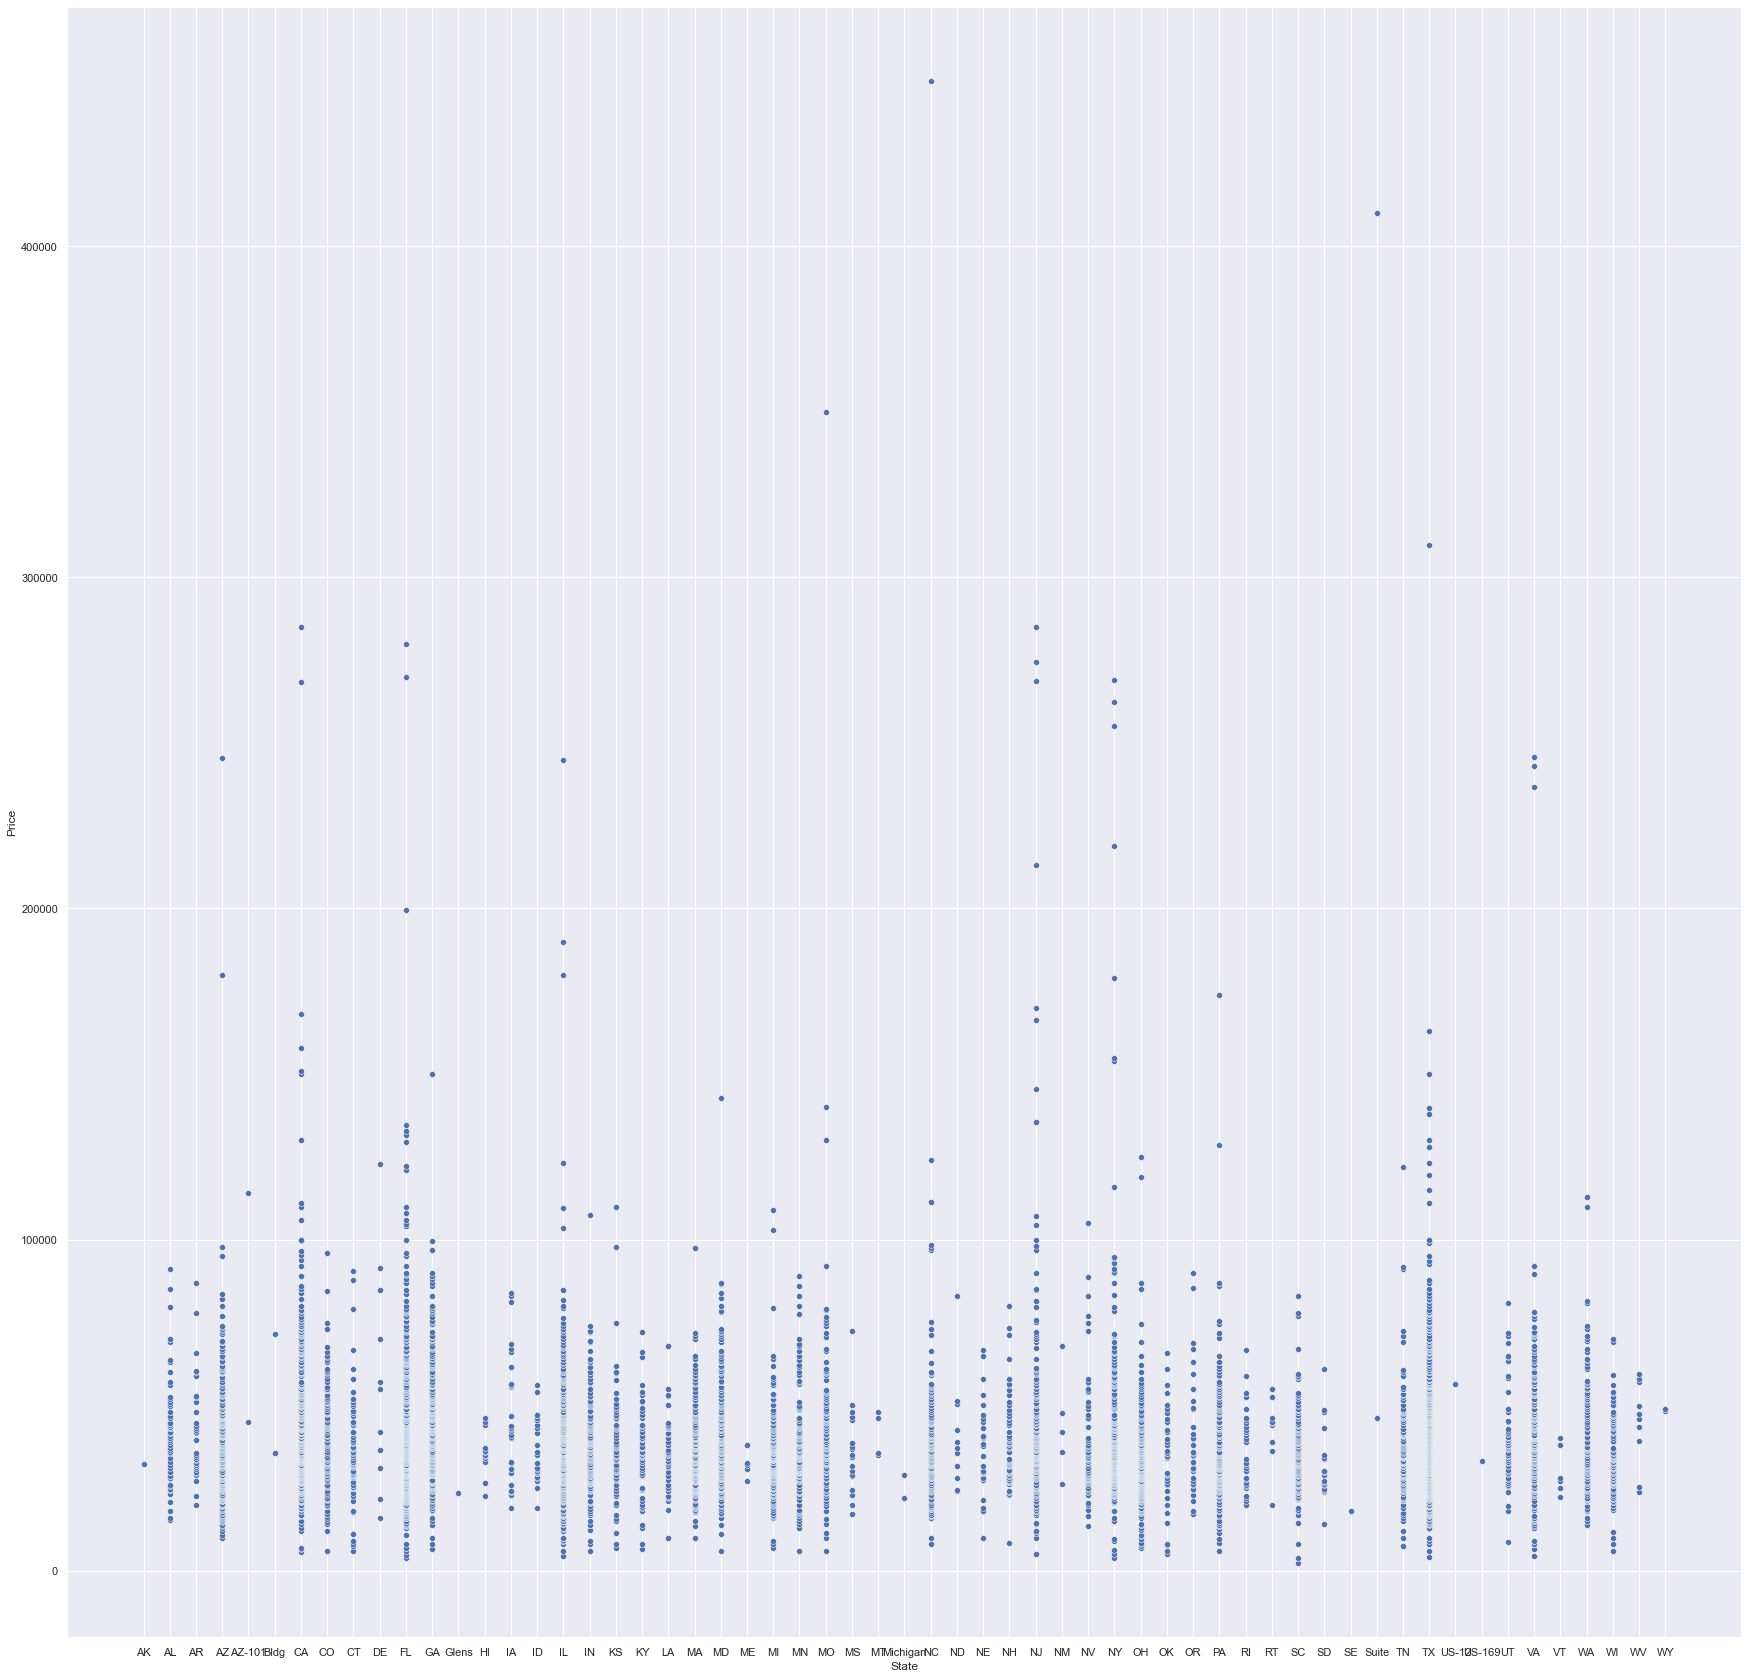

In [13]:
sns.set(rc={'figure.figsize':(30,30)})
sns.scatterplot(data=price, x='State', y='Price');

In [14]:
#Texas, Florida, California and Illinois are best for car buying and selling.